In [85]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [30]:
%%time
# Generate a sample dataset
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, random_state=666)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

CPU times: user 10.9 ms, sys: 1.94 ms, total: 12.9 ms
Wall time: 11.7 ms


In [31]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Convert labels to one-hot encoding (required for categorical crossentropy loss)
# y_train_one_hot = tf.one_hot(y_train, depth=2)
# y_test_one_hot = tf.one_hot(y_test, depth=2)

In [63]:
num_features = X_train.shape[1]

# Build the logistic regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid', 
                          kernel_regularizer=tf.keras.regularizers.l1(0.1)
                         )
])

In [64]:
metrics = [
    tf.keras.metrics.BinaryCrossentropy(name='cross entropy'),
    tf.keras.metrics.MeanSquaredError(name='mse'),
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='prc', curve='PR')
]

In [65]:
learning_rate = 0.01
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [66]:
# Compile the model
model.compile(optimizer=adam_optimizer,
              loss='binary_crossentropy',
              metrics=metrics
             )

In [67]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
250/250 [==============================] - 1s 738us/step - loss: 0.6904 - cross entropy: 0.5098 - mse: 0.1628 - tp: 3250.0000 - fp: 750.0000 - tn: 3279.0000 - fn: 721.0000 - accuracy: 0.8161 - precision: 0.8125 - recall: 0.8184 - auc: 0.8640 - prc: 0.8370
Epoch 2/10
250/250 [==============================] - 0s 742us/step - loss: 0.5233 - cross entropy: 0.3420 - mse: 0.0932 - tp: 3685.0000 - fp: 318.0000 - tn: 3711.0000 - fn: 286.0000 - accuracy: 0.9245 - precision: 0.9206 - recall: 0.9280 - auc: 0.9679 - prc: 0.9650
Epoch 3/10
250/250 [==============================] - 0s 748us/step - loss: 0.5072 - cross entropy: 0.3422 - mse: 0.0933 - tp: 3687.0000 - fp: 310.0000 - tn: 3719.0000 - fn: 284.0000 - accuracy: 0.9258 - precision: 0.9224 - recall: 0.9285 - auc: 0.9678 - prc: 0.9649
Epoch 4/10
250/250 [==============================] - 0s 736us/step - loss: 0.4978 - cross entropy: 0.3291 - mse: 0.0888 - tp: 3652.0000 - fp: 314.0000 - tn: 3715.0000 - fn: 319.0000 - accuracy: 0.92

In [69]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)

63/63 [==============================] - 0s 457us/step


In [70]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

63/63 [==============================] - 0s 486us/step


In [73]:
y_pred_proba

array([[0.7920805 ],
       [0.49167126],
       [0.16792768],
       ...,
       [0.69902337],
       [0.20817992],
       [0.75566506]], dtype=float32)

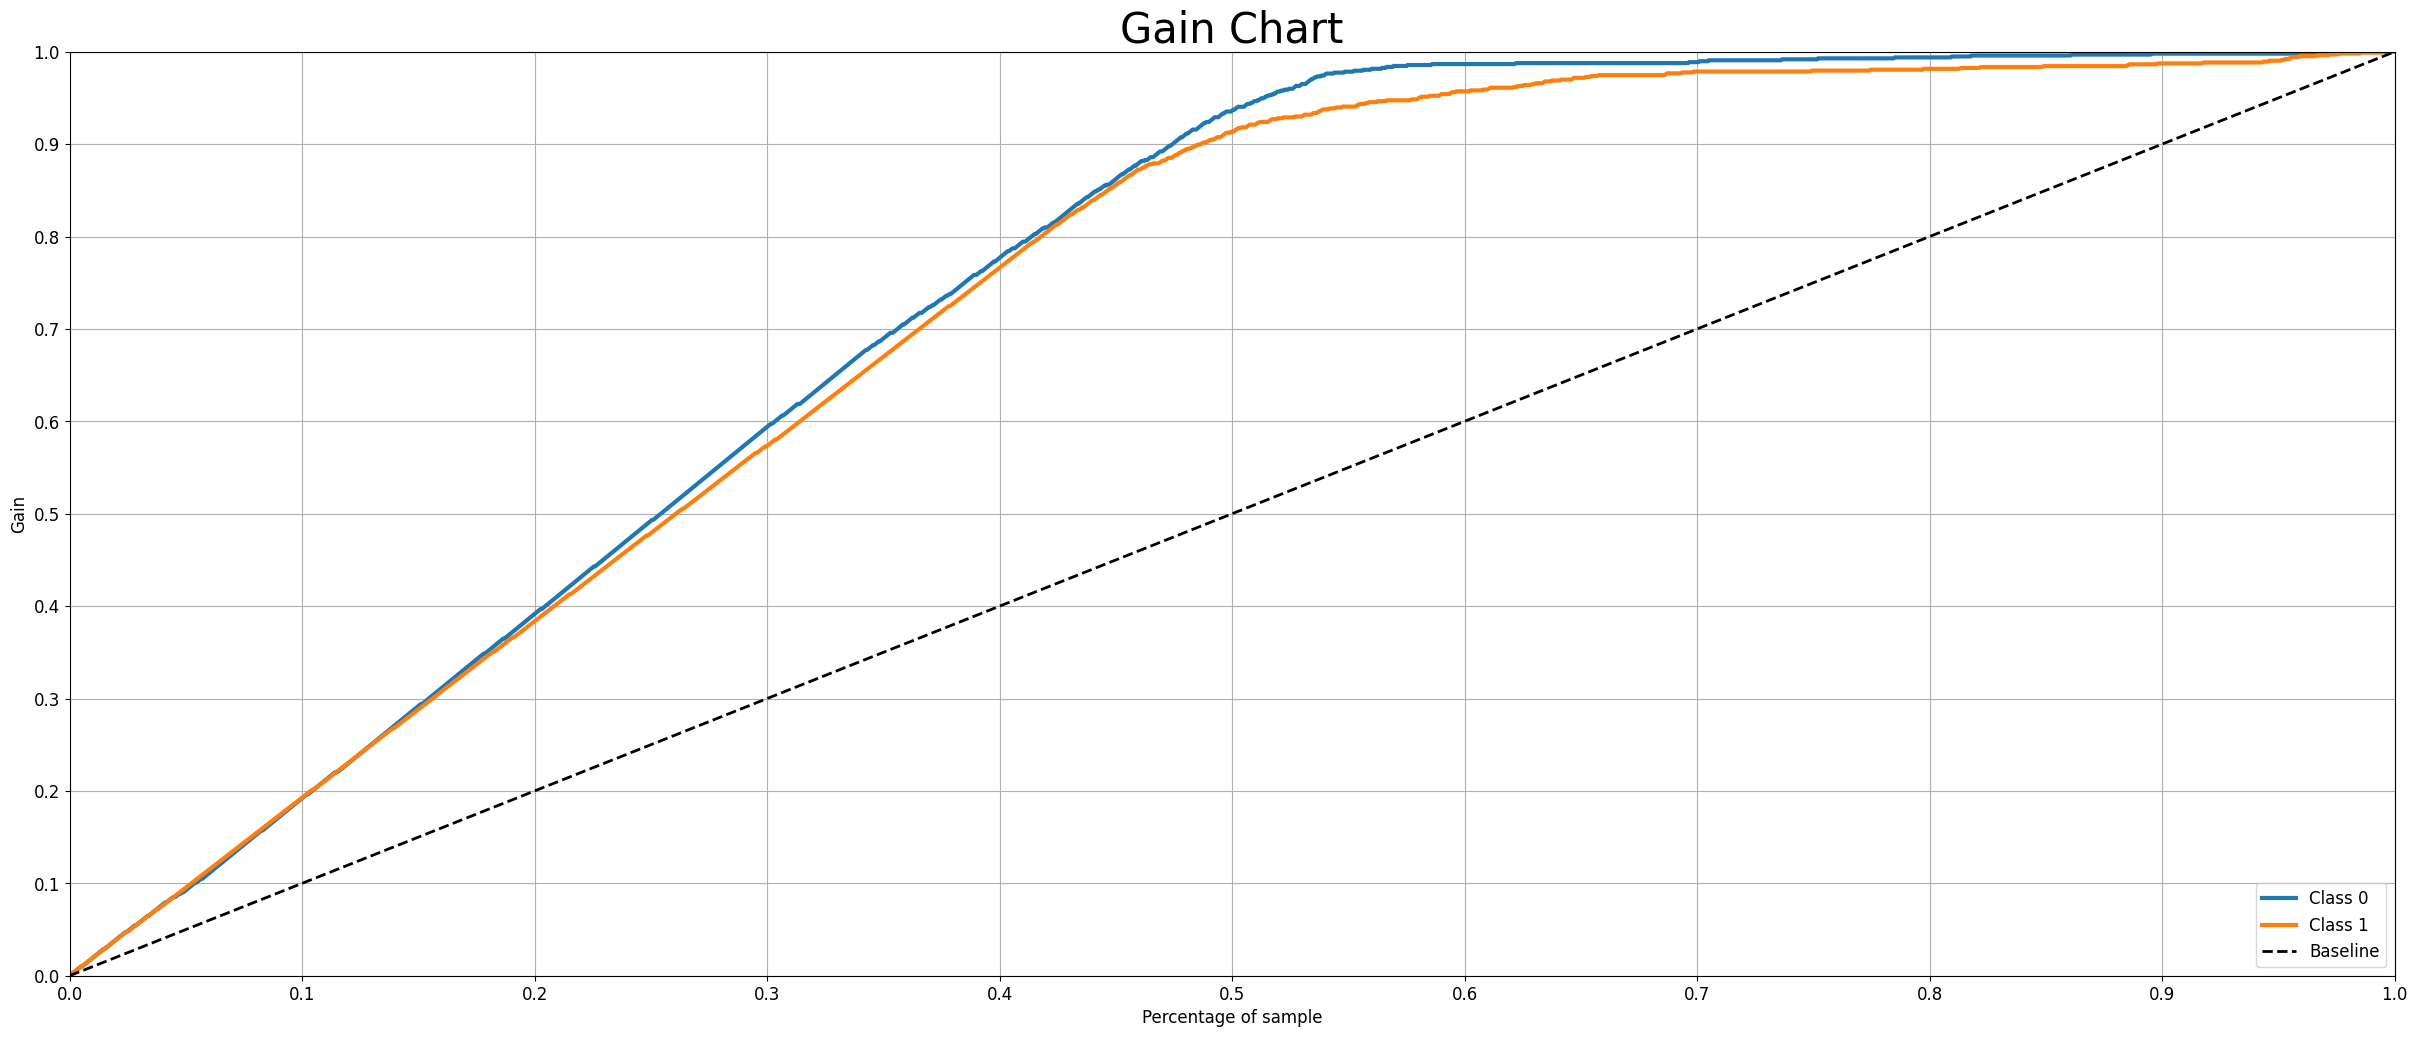

In [74]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_cumulative_gain(
    np.array(y_test),
    np.column_stack((1-y_pred_proba[:,0],y_pred_proba[:,0])),
    figsize=(30,12),
    title_fontsize=20,
    text_fontsize=12
)

plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,step=0.1))
plt.yticks(np.arange(0,1.1,step=0.1))
plt.title("Gain Chart", size=30),
plt.rc('lines', linewidth=1.5, color='r')
plt.show()

In [71]:
model.get_weights()

[array([[-2.0312490e-03],
        [ 2.6847096e-03],
        [ 2.7781886e-01],
        [ 3.9669783e-03],
        [-3.0621700e-04],
        [ 4.1091964e-03],
        [ 1.4845566e+00],
        [-1.3012078e-03],
        [-3.7834665e-03],
        [ 1.3013597e-03]], dtype=float32),
 array([-0.00554618], dtype=float32)]

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the SVM model
class SVM(nn.Module):
    def __init__(self):
        super(SVM, self).__init__()
        self.linear = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the SVM model, loss function, and optimizer
model = SVM()
criterion = nn.HingeEmbeddingLoss()  # Hinge loss for SVM
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, 2 * y_train_tensor - 1)  # Convert {0, 1} labels to {-1, 1}

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    y_pred = model(X_test_tensor).sign().numpy()

# Convert predictions to {0, 1} labels
y_pred = (y_pred + 1) / 2

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.4f}')

Epoch [10/1000], Loss: 0.5485
Epoch [20/1000], Loss: 0.5441
Epoch [30/1000], Loss: 0.5401
Epoch [40/1000], Loss: 0.5364
Epoch [50/1000], Loss: 0.5332
Epoch [60/1000], Loss: 0.5301
Epoch [70/1000], Loss: 0.5274
Epoch [80/1000], Loss: 0.5249
Epoch [90/1000], Loss: 0.5228
Epoch [100/1000], Loss: 0.5210
Epoch [110/1000], Loss: 0.5194
Epoch [120/1000], Loss: 0.5180
Epoch [130/1000], Loss: 0.5168
Epoch [140/1000], Loss: 0.5157
Epoch [150/1000], Loss: 0.5148
Epoch [160/1000], Loss: 0.5140
Epoch [170/1000], Loss: 0.5132
Epoch [180/1000], Loss: 0.5126
Epoch [190/1000], Loss: 0.5121
Epoch [200/1000], Loss: 0.5116
Epoch [210/1000], Loss: 0.5111
Epoch [220/1000], Loss: 0.5108
Epoch [230/1000], Loss: 0.5104
Epoch [240/1000], Loss: 0.5101
Epoch [250/1000], Loss: 0.5098
Epoch [260/1000], Loss: 0.5095
Epoch [270/1000], Loss: 0.5093
Epoch [280/1000], Loss: 0.5091
Epoch [290/1000], Loss: 0.5089
Epoch [300/1000], Loss: 0.5088
Epoch [310/1000], Loss: 0.5086
Epoch [320/1000], Loss: 0.5085
Epoch [330/1000],

In [133]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a sample dataset (for example, the Iris dataset)
from sklearn.datasets import load_iris

In [135]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

df = data[data['target'] != 2]

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [136]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
y_train.shape

(80,)

In [138]:
y_test.shape

(20,)

In [140]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)

# Define the SVM model
class SVM(nn.Module):
    def __init__(self):
        super(SVM, self).__init__()
        self.linear = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the SVM model, loss function, and optimizer
model = SVM()
criterion = nn.HingeEmbeddingLoss()  # Hinge loss for SVM
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Learning rate schedule
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)


# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), 2 * y_train_tensor - 1)  # Convert {0, 1} labels to {-1, 1}

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Learning rate schedule step
    # scheduler.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    y_pred = model(X_test_tensor).sign().numpy()

# Convert predictions to {0, 1} labels
y_pred = (1- y_pred )/ 2

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.4f}')

Epoch [10/100], Loss: 0.0603
Epoch [20/100], Loss: -0.2001
Epoch [30/100], Loss: -0.4024
Epoch [40/100], Loss: -0.5460
Epoch [50/100], Loss: -0.6645
Epoch [60/100], Loss: -0.7704
Epoch [70/100], Loss: -0.8715
Epoch [80/100], Loss: -0.9694
Epoch [90/100], Loss: -1.0665
Epoch [100/100], Loss: -1.1608
Accuracy on Test Set: 1.0000


In [141]:
# Evaluate the model on the test set
with torch.no_grad():
    y_pred_logits = model(X_test_tensor)
    y_pred_proba = torch.sigmoid(y_pred_logits)

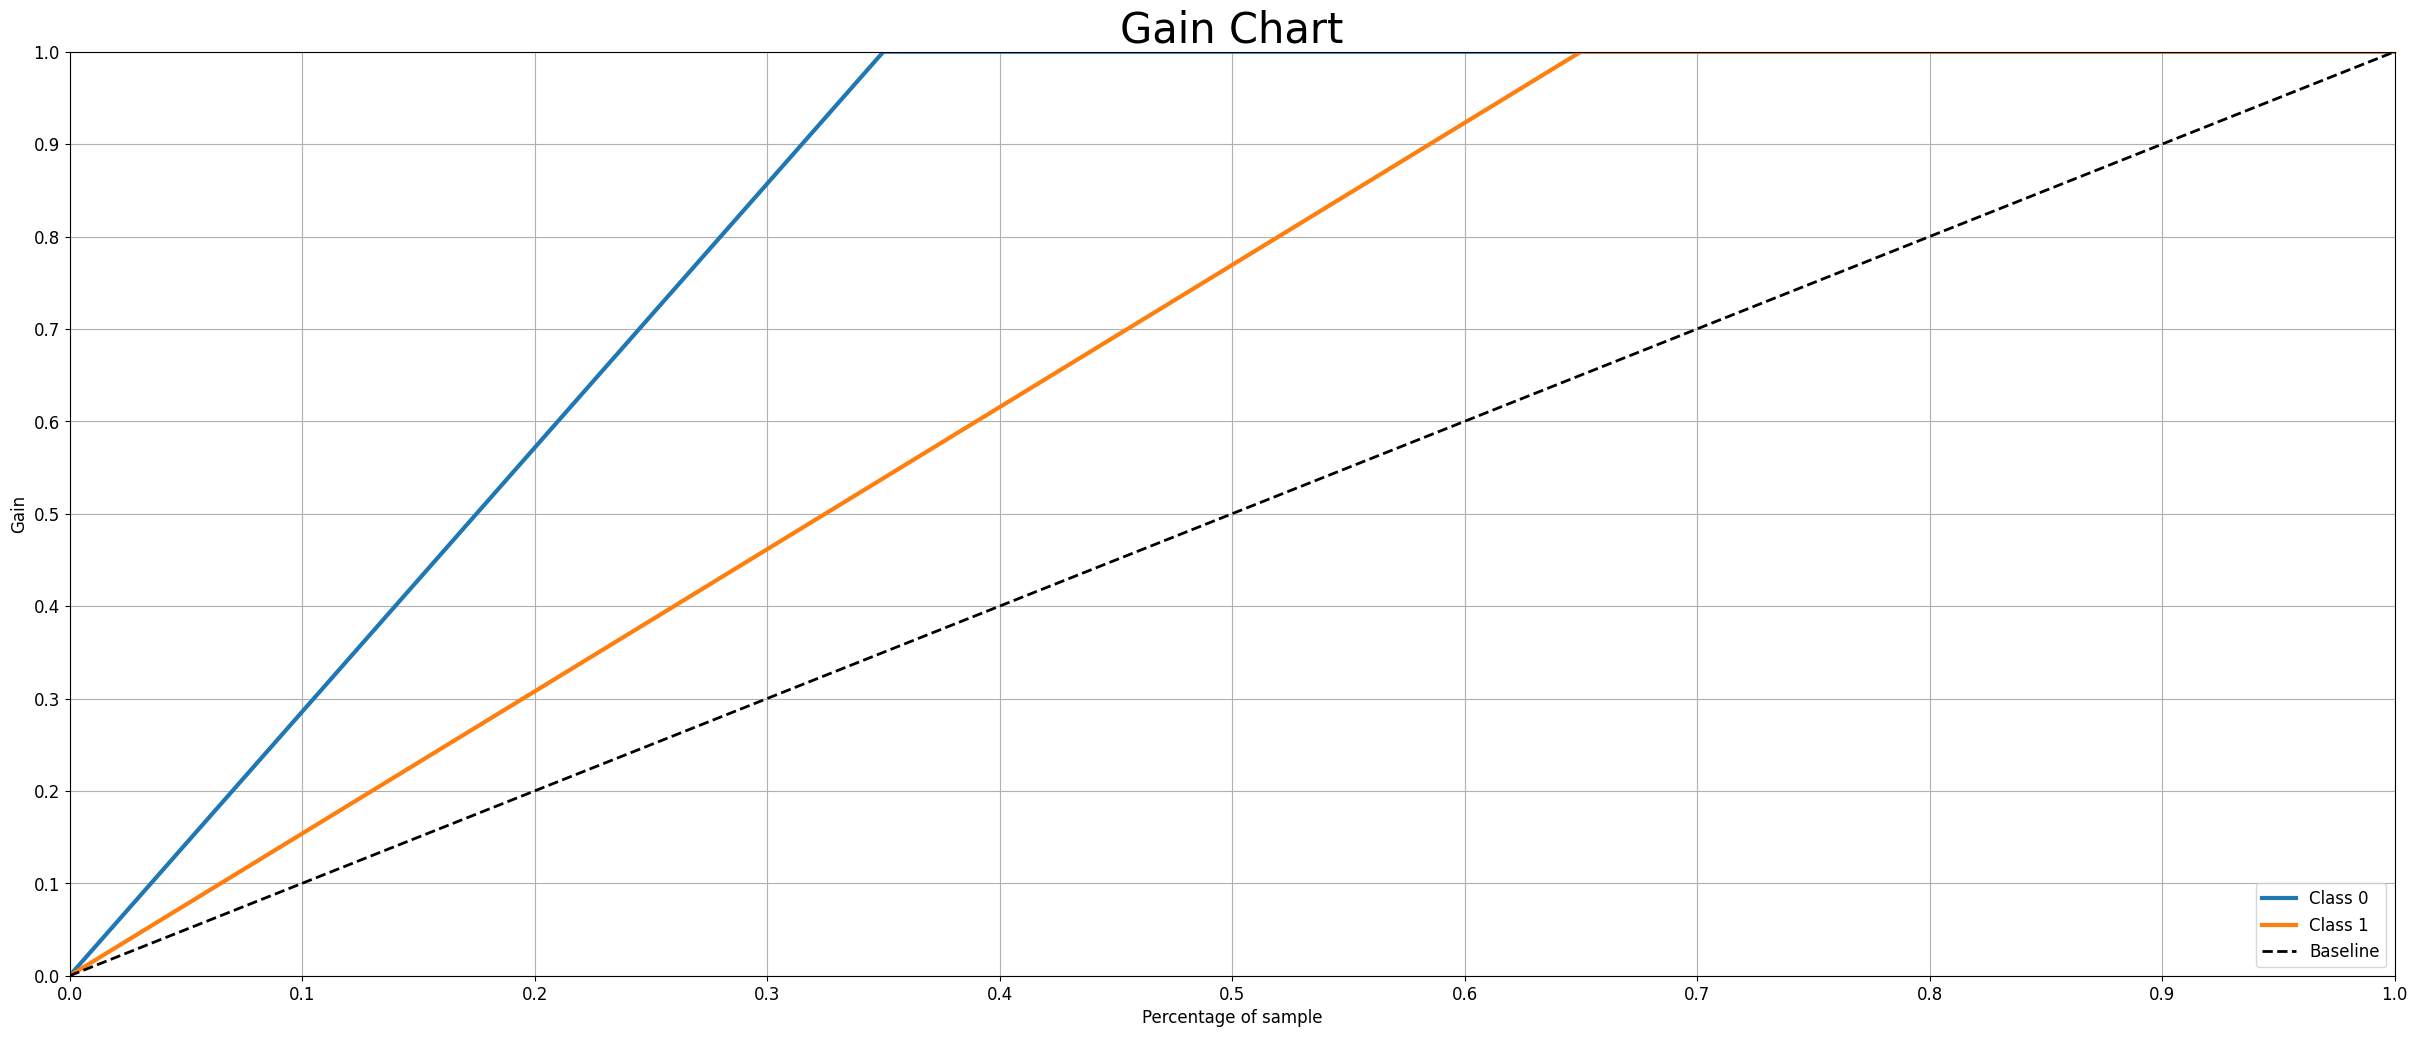

In [146]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_cumulative_gain(
    np.array(y_test),
    np.column_stack((y_pred_proba[:,0],1-y_pred_proba[:,0])),
    figsize=(30,12),
    title_fontsize=20,
    text_fontsize=12
)

plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,step=0.1))
plt.yticks(np.arange(0,1.1,step=0.1))
plt.title("Gain Chart", size=30),
plt.rc('lines', linewidth=1.5, color='r')
plt.show()

In [144]:
y_pred_proba.numpy()

array([[0.86739105],
       [0.8198639 ],
       [0.11438765],
       [0.09424444],
       [0.21198124],
       [0.01677962],
       [0.1291449 ],
       [0.8445534 ],
       [0.8390388 ],
       [0.90510017],
       [0.92532766],
       [0.15660712],
       [0.06345204],
       [0.10442208],
       [0.07519731],
       [0.02261426],
       [0.12578431],
       [0.7782369 ],
       [0.07124914],
       [0.09883197]], dtype=float32)

In [129]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM model with probability estimates
svm_model = SVC(probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions and probability estimates on the test set
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)

# Calculate accuracy and log loss
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {logloss:.4f}')


Accuracy: 0.8300
Log Loss: 0.4148


In [ ]:
# ...

# Instantiate the SVM model, loss function, and optimizer
model = SVM()
criterion = nn.HingeEmbeddingLoss()  # Hinge loss for SVM
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Learning rate schedule
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), 2 * y_train_tensor - 1)  # Convert {0, 1} labels to {-1, 1}

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Learning rate schedule step
    scheduler.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# ...
